1. Read the dataset
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into train and test sets 
5. Normalize the train and test data (2.5 points) 
6. Initialize & build the model (10 points) 
7. Optimize the model (5 points) 
9. Predict the results using 0.5 as a threshold (5 points) 
10. Print the Accuracy score and confusion matrix (2.5 points) 


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


## **Description** 


Given a dataset consisiting of Bank Customer information, we are asked to build a classifier which will tell us if a customer will exit the bank or not.





In [2]:
%matplotlib inline
import math, random, warnings
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from IPython.core.interactiveshell import InteractiveShell

In [0]:
# Configure for any default setting of any library
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

In [0]:
data_churn = pd.read_csv("/gdrive/My Drive/greatlakes/Projects/NeuralNetwork/Churn.csv")

In [5]:
data_churn.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

# **Performing EDA**

**Univariate analysis** - data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

**Bivariate analysis** between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

Strategies to address the different data challenges such as data pollution, outliers and missing values

# Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector** .

Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of dependent features. In above dataset, features are 'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary'.

Response vector contains the value of class variable(prediction or output) for each row of feature matrix. In above dataset, the class variable name is 'Exited'.

In [6]:
data_churn.shape

(10000, 14)

In [7]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are **10000 rows** in the dataset and **14 columns**.

There are **No null/missing values** present in the dataset.

In [8]:
data_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

We have to consider which features play a role in someone exiting a bank and we will be removing irrelevant features

In [9]:
data_churn.sample(4)

RowNumber  CustomerId Surname  ...  IsActiveMember EstimatedSalary Exited
7237       7238    15753550  Levien  ...               0       131093.99      0
7097       7098    15664793   Scott  ...               1       150685.52      0
618         619    15594594  Loggia  ...               1        86945.00      0
8762       8763    15765173     Lin  ...               0       113796.15      1

[4 rows x 14 columns]

**We can see that 'RowNumber', 'CustomerId', 'Surname' doesnot play any role in someone churning , so we will be removing these features**


In [0]:
#data_churn[~data_churn.applymap(np.isreal).all(1)]

### 2. Drop the columns which are unique for all users like IDs

In [0]:
data_churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [12]:
data_churn.sample(4)

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
441           790    France  Female  ...               0         84126.75       0
7338          708   Germany  Female  ...               1        125311.17       1
3320          712    France    Male  ...               1        121232.51       0
9069          619     Spain  Female  ...               1        172792.43       1

[4 rows x 11 columns]

In [13]:
data_churn.shape

(10000, 11)

We have removed 'RowNumber', 'CustomerId', 'Surname' , now our dataset contains 11 columns

In [14]:
data_churn.describe().T

count           mean  ...          75%        max
CreditScore      10000.0     650.528800  ...     718.0000     850.00
Age              10000.0      38.921800  ...      44.0000      92.00
Tenure           10000.0       5.012800  ...       7.0000      10.00
Balance          10000.0   76485.889288  ...  127644.2400  250898.09
NumOfProducts    10000.0       1.530200  ...       2.0000       4.00
HasCrCard        10000.0       0.705500  ...       1.0000       1.00
IsActiveMember   10000.0       0.515100  ...       1.0000       1.00
EstimatedSalary  10000.0  100090.239881  ...  149388.2475  199992.48
Exited           10000.0       0.203700  ...       0.0000       1.00

[9 rows x 8 columns]

Comments

This ".describe()" function generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.


25% is also known as First Quartile (Q1), 50% as Second Quartile or Median (Q2) and 75% as Third Quartile (Q3)

## **Observations**

The dataset contains data about customers who are of age 18 yrs (minimum) and 92(maximum) . Mean age is around 37

Some of the customers have **0** account balance, Infact **25%** of people have **0 account balance**.


In [15]:
# Compare class wise mean
pd.pivot_table(data_churn,index='Exited',aggfunc=['mean'])

mean                ...                        
              Age       Balance  ... NumOfProducts    Tenure
Exited                           ...                        
0       37.408389  72745.296779  ...      1.544267  5.033279
1       44.837997  91108.539337  ...      1.475209  4.932744

[2 rows x 8 columns]

Age,Balance,EstimatedSalary mean of customer churning is more than customer not churning

In [16]:
# Compare class wise count
data_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
# List the numerical and categorical columns
numeric_cols = data_churn.select_dtypes(include=[np.number]).columns.tolist()
categ_cols = data_churn.select_dtypes(include=[np.object]).columns.tolist()
print('The numeric attributes are:', numeric_cols)
print('The categorical attributes are:', categ_cols)

The numeric attributes are: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
The categorical attributes are: ['Geography', 'Gender']


In [18]:
data_churn[categ_cols].nunique()

Geography    3
Gender       2
dtype: int64

In [19]:
data_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
pd.pivot_table(data_churn[['Age','Balance','Gender','Tenure','Geography','Exited']],index='Exited',columns='Geography',aggfunc=['count'])

count                        ...                            
             Age               Balance  ... Gender Tenure              
Geography France Germany Spain  France  ...  Spain France Germany Spain
Exited                                  ...                            
0           4204    1695  2064    4204  ...   2064   4204    1695  2064
1            810     814   413     810  ...    413    810     814   413

[2 rows x 12 columns]

In [21]:
len(numeric_cols)

9

<Figure size 1080x1080 with 0 Axes>

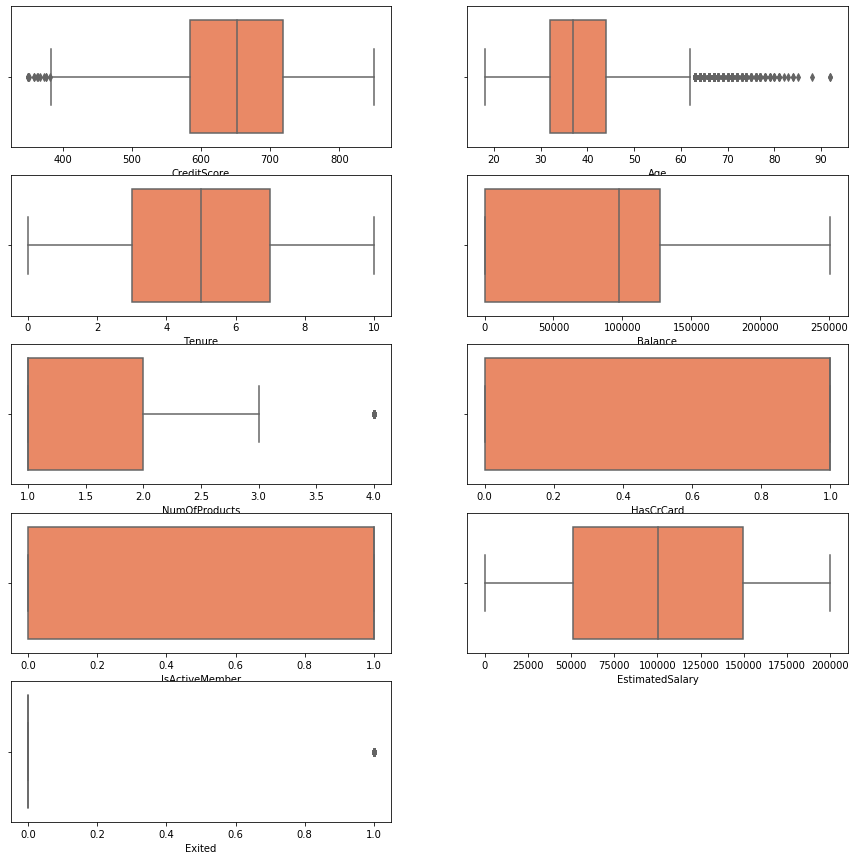

In [22]:
# Check the distribution Central Tendency
plt.figure(figsize=(15,15))
index = 1
for col in numeric_cols:
    plt.subplot(round(len(numeric_cols) / 2) +1, 2, index)
    sns.boxplot(data_churn[col], color='coral')
    index += 1

<Figure size 720x360 with 0 Axes>

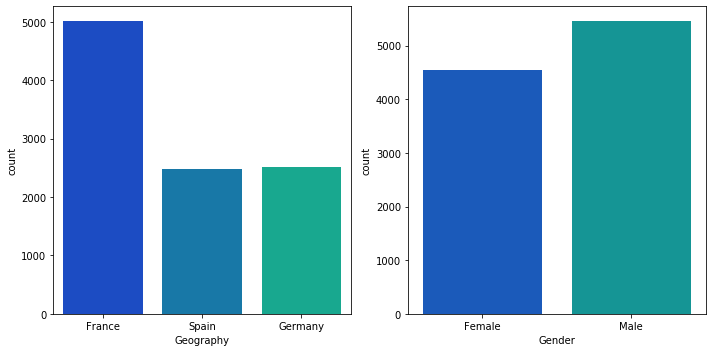

In [23]:
# Check the frequency inside each categorical features
plt.figure(figsize=(10,5))
index = 1
for col in categ_cols:
    plt.subplot(round(len(categ_cols) / 2), 2, index)
    sns.countplot(col, data=data_churn, palette='winter')
    if col == 'job':
        plt.xticks(rotation='vertical')
    index += 1
plt.tight_layout()

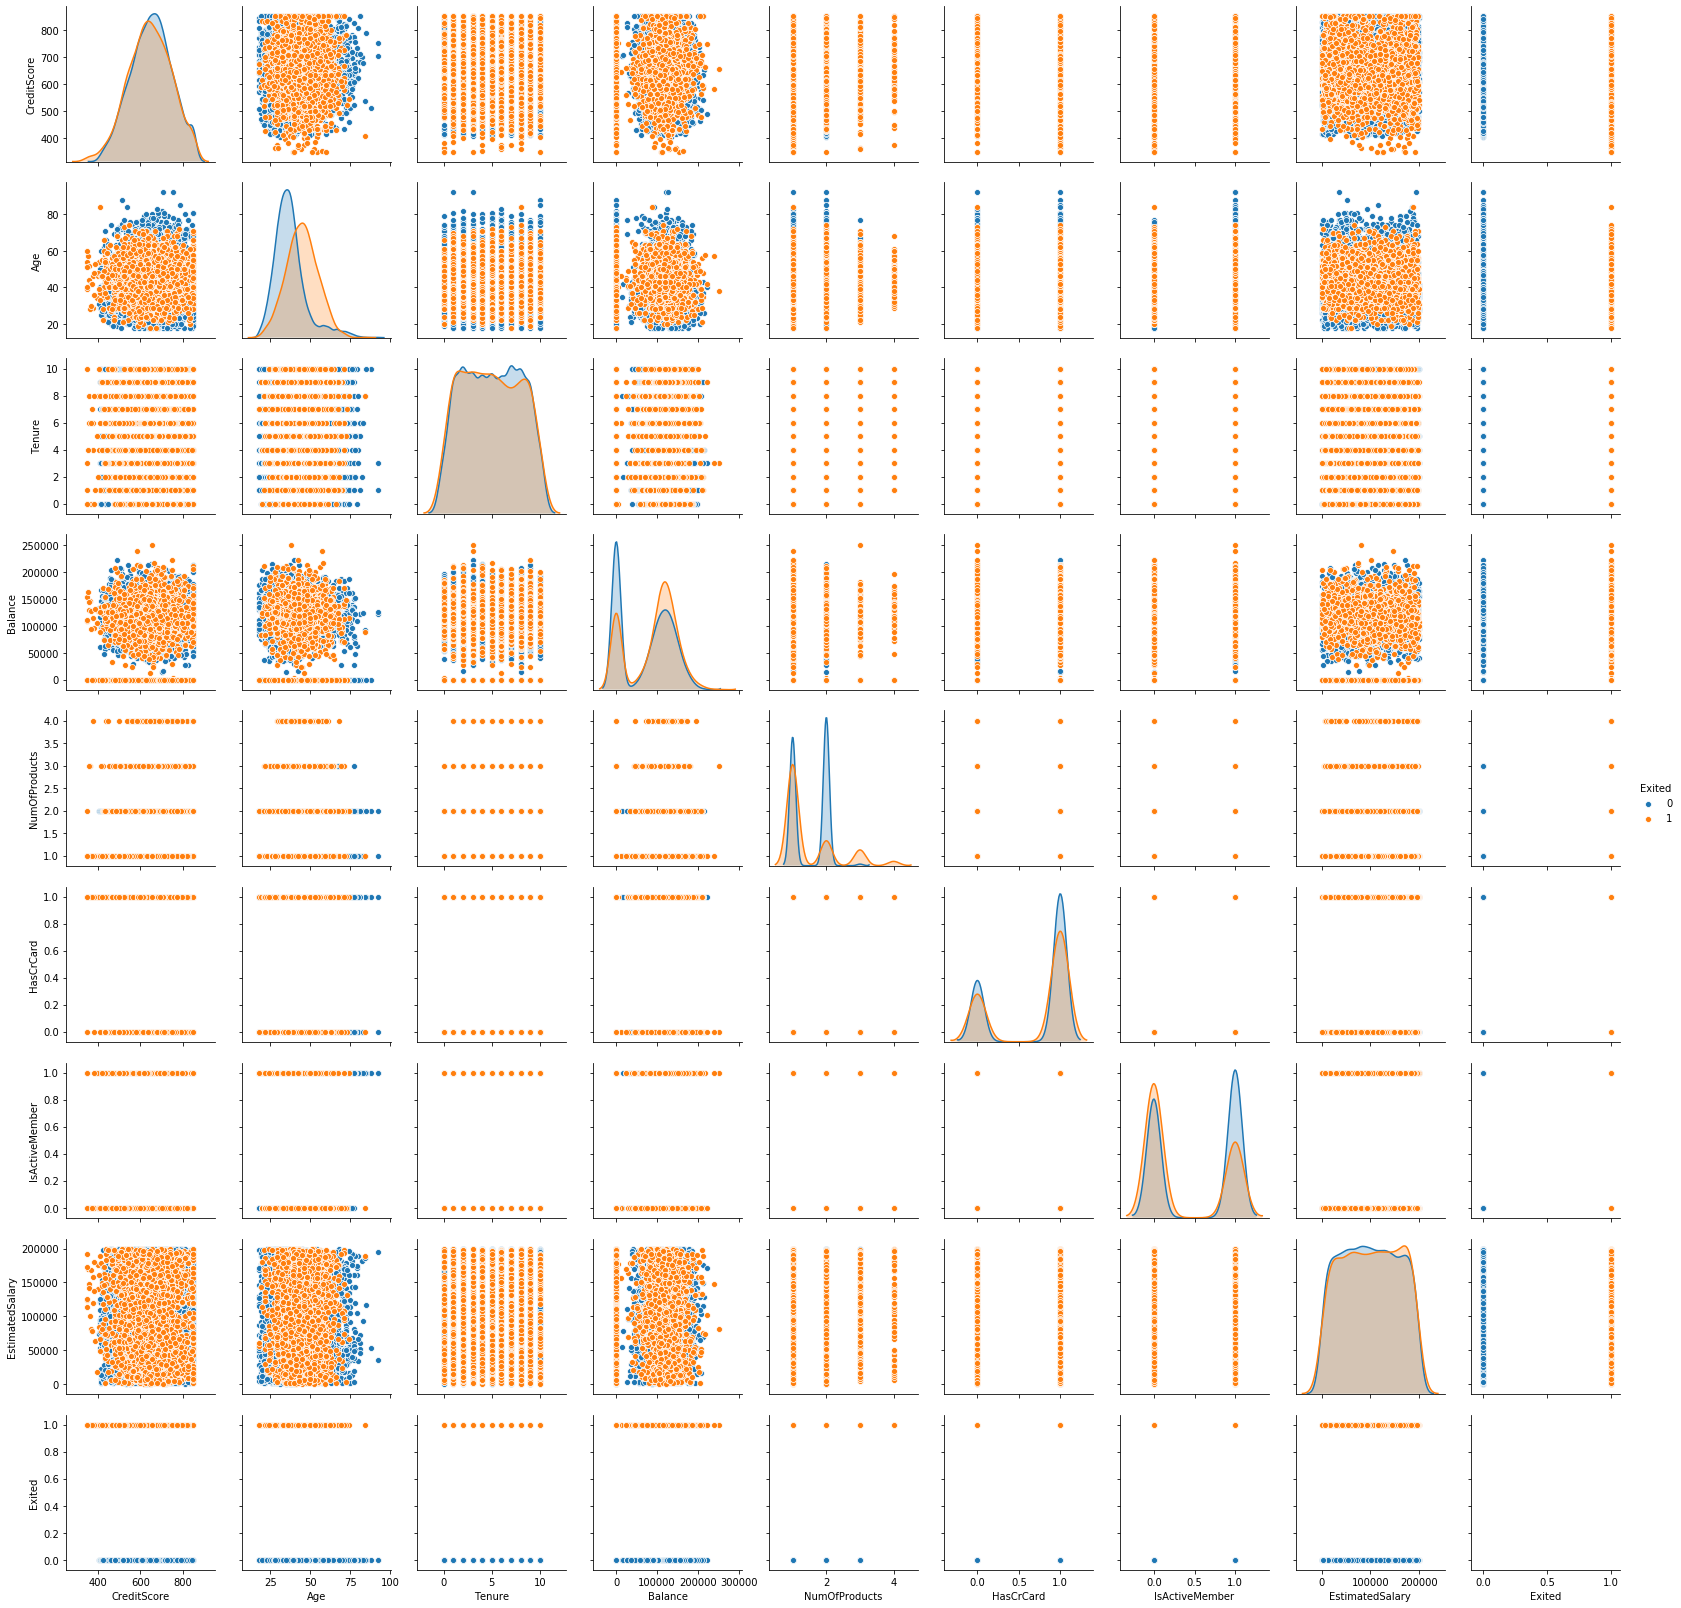

In [24]:
# Pairwise relationship of numerical features in each of the category of Target
sns.pairplot(data_churn, hue='Exited', diag_kind='kde')

In [0]:
data_churn = pd.get_dummies(data_churn, columns=['Geography'])

In [0]:
gender_encoder = LabelEncoder()
data_churn['Gender'] = gender_encoder.fit_transform(data_churn['Gender'])

In [27]:
list(gender_encoder.classes_)

['Female', 'Male']

In [28]:
data_churn.sample(5)

CreditScore  Gender  ...  Geography_Germany  Geography_Spain
9266          683       0  ...                  0                0
3068          653       0  ...                  0                0
3731          554       0  ...                  1                0
9507          808       1  ...                  0                0
3975          535       0  ...                  0                0

[5 rows x 13 columns]

In [29]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CreditScore          10000 non-null int64
Gender               10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [0]:
X = data_churn.drop(['Exited'],axis=1)
y = data_churn['Exited']

### Splitting the dataset into the Training and Testing set.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Normalize the train and test data aka Feature scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. It is basically scaling all the dimensions to be even so that one independent variable does not dominate another

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train = pd.DataFrame(X_scaled_train, columns=X.columns)
#X_test = pd.DataFrame(X_scaled_test, columns=X.columns)

In [33]:
type(X_train)

numpy.ndarray

### Initialize & build the model (10 points)

In [0]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense(11, kernel_initializer='he_normal',activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal',activation = 'relu'))

model.add(tf.keras.layers.Dense(25, kernel_initializer='he_normal',activation = 'relu'))

#Add OUTPUT layer
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
# If we want more than two categories, then we will need to change softmax
model.add(tf.keras.layers.Dense(1, kernel_initializer='he_normal', 
                                activation='sigmoid'))

### Compiling the Neural Network

Tuning the individual weights on each neuron


**optimizer**: [adam The] algorithm we want to use to find the optimal set of weights in the neural networks.

**loss**: [binary_crossentropy] This is the loss function used within adam. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

**metrics**: [accuracy] The accuracy metrics which will be evaluated by the model

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
#Define tensorboard callback
tboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/v1')

In [0]:
#Load tensorboard module
%load_ext tensorboard

In [38]:
#Start tensorboard
%tensorboard --logdir logs

In [39]:
history = model.fit(X_train,y_train.to_numpy(),          
          validation_data=(X_test,y_test.to_numpy()),
          epochs=20,
          batch_size=32, callbacks=[tboard])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 135us/sample - loss: 0.4613 - acc: 0.8059 - val_loss: 0.4275 - val_acc: 0.8230
Epoch 2/20
8000/8000 [==============================] - 1s 73us/sample - loss: 0.4167 - acc: 0.8259 - val_loss: 0.3897 - val_acc: 0.8405
Epoch 3/20
8000/8000 [==============================] - 1s 67us/sample - loss: 0.3914 - acc: 0.8356 - val_loss: 0.3698 - val_acc: 0.8525
Epoch 4/20
8000/8000 [==============================] - 1s 68us/sample - loss: 0.3810 - acc: 0.8422 - val_loss: 0.3669 - val_acc: 0.8435
Epoch 5/20
8000/8000 [==============================] - 1s 71us/sample - loss: 0.3686 - acc: 0.8470 - val_loss: 0.3602 - val_acc: 0.8570
Epoch 6/20
8000/8000 [==============================] - 1s 81us/sample - loss: 0.3690 - acc

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  143       
_________________________________________________________________
batch_normalization (BatchNo multiple                  44        
_________________________________________________________________
dense_1 (Dense)              multiple                  1200      
_________________________________________________________________
dense_2 (Dense)              multiple                  2525      
_________________________________________________________________
dense_3 (Dense)              multiple                  26        
Total params: 3,938
Trainable params: 3,916
Non-trainable params: 22
_________________________________________________________________


(0, 1)

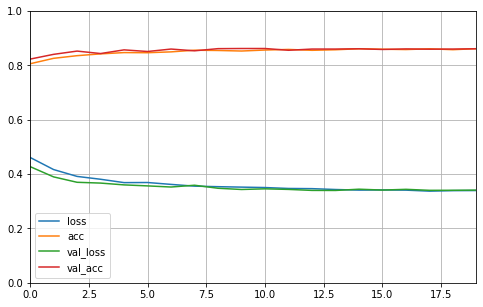

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
model.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 26us/sample - loss: 0.3410 - acc: 0.8610


[0.34102151107788087, 0.861]

In [43]:
y_pred = model.predict(X_test)
print(y_pred)

[[0.39037624]
 [0.32012886]
 [0.15359083]
 ...
 [0.03462902]
 [0.11212406]
 [0.21432176]]


This provides us probabilities. We need to convert these probabilities into the form true or false. So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.

In [44]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861

Accuracy is 85 %

In [46]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[1517   78]
 [ 200  205]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.72      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [47]:
!ls -l

total 8
drwxr-xr-x 3 root root 4096 Dec  8 12:29 logs
drwxr-xr-x 1 root root 4096 Nov 27 22:38 sample_data


In [0]:
model.save('bank_churn_v1.h5')

In [49]:
!ls -l

total 108
-rw-r--r-- 1 root root 101336 Dec  8 12:29 bank_churn_v1.h5
drwxr-xr-x 3 root root   4096 Dec  8 12:29 logs
drwxr-xr-x 1 root root   4096 Nov 27 22:38 sample_data


#### Model 2 - Optimising

In [50]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model2 = tf.keras.models.Sequential()


model2.add(tf.keras.layers.Input(12))

model2.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU())
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(50, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU())
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(25, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU())
model2.add(tf.keras.layers.BatchNormalization())
#Add OUTPUT layer
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
# If we want more than two categories, then we will need to change softmax
model2.add(tf.keras.layers.Dense(1, kernel_initializer='he_normal', 
                                activation='sigmoid'))

#Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

#Modelcheckpoint callback
ckpt = tf.keras.callbacks.ModelCheckpoint('mnist_v2.hdf5', save_best_only=True,
                                          monitor='val_loss', mode='min')
tboard2= tf.keras.callbacks.TensorBoard(log_dir='./logs/v2')
history2 = model2.fit(X_train,y_train.to_numpy(),          
          validation_data=(X_test,y_test.to_numpy()),
          epochs=20,
          batch_size=32, callbacks=[tboard,ckpt])

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 161us/sample - loss: 0.5012 - acc: 0.7786 - val_loss: 0.3964 - val_acc: 0.8395
Epoch 2/20
8000/8000 [==============================] - 1s 87us/sample - loss: 0.3810 - acc: 0.8403 - val_loss: 0.3593 - val_acc: 0.8470
Epoch 3/20
8000/8000 [==============================] - 1s 91us/sample - loss: 0.3692 - acc: 0.8449 - val_loss: 0.3537 - val_acc: 0.8470
Epoch 4/20
8000/8000 [==============================] - 1s 88us/sample - loss: 0.3653 - acc: 0.8486 - val_loss: 0.3442 - val_acc: 0.8560
Epoch 5/20
8000/8000 [==============================] - 1s 89us/sample - loss: 0.3625 - acc: 0.8455 - val_loss: 0.3365 - val_acc: 0.8660
Epoch 6/20
8000/8000 [==============================] - 1s 93us/sample - loss: 0.3586 - acc: 0.8500 - val_loss: 0.3436 - val_acc: 0.8580
Epoch 7/20
8000/8000 [==============================] - 1s 82us/sample - loss: 0.3509 - acc: 0.8506 - val_loss: 0.3374 - val_acc:

In [51]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs (started 0:00:36 ago; pid 329)


In [52]:
model_loaded = tf.keras.models.load_model('mnist_v2.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1

(0, 1)

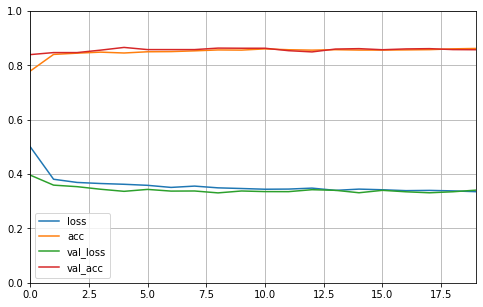

In [54]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
model_loaded.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 70us/sample - loss: 0.3308 - acc: 0.8635


[0.3308159551620483, 0.8635]

In [57]:
from sklearn import metrics
y_pred_loaded = model_loaded.predict(X_test)
y_pred_loaded = (y_pred_loaded > 0.5)
print(y_pred_loaded)
print(metrics.confusion_matrix(y_test, y_pred_loaded))
print(metrics.classification_report(y_test, y_pred_loaded))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[1505   90]
 [ 183  222]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.55      0.62       405

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000



#### Over all accuracy has increased by 1 %